# Redes Neuronales Convolucionales (CNN)
En esta clase veremos de qué manera logramos superar los obstáculos de representación de características que nos presentan las imágenes al ser tratadas solamente como matrices de píxeles. Mediante redes convolucionales podemos obtener features específicas que permitirán modelar mejor ciertos rasgos de las imágenes.



## Convoluciones

Una convolución es una transformación mediante cálculo matricial sobre los píxeles de una imagen en sus distintos canales. Se aplica una máscara, que permitirá realzar ciertas características presentes o no en la imagen:

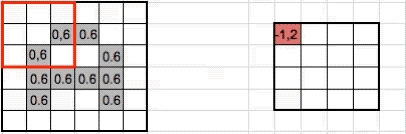

Los píxeles transformados formarán una nueva imagen, la cuál representará mejor una feature particular de interés, de acuerdo al problema de clasificación presente. Los pesos de las máscaras o kernels a aplicar (valores que multiplican las intensidades de los píxeles en cada posición) pueden entrenarse conjuntamente con los demás parámetros de la red, dotando al modelo de la capacidad de extraer "features abstractas" de alto nivel para alimentar a las capas densas al final de la red. Cada capa convolucional puede contener más de una convolución, por lo que se pueden obtener tantas features como se requiera.

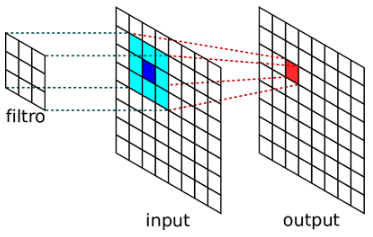

Luego de una capa de convolución, se aplica en general una capa de agrupamiento (Pooling). En este tipo de capa, se toma como valor de píxel correspondiente a un cuadrado de la imagen al píxel de mayor o menor intensidad, o al promedio del valor de los píxeles del área (MaxPooling, MinPooling o AvgPooling). De esta forma se obtiene una imagen de menor tamaño, resaltando características importantes.

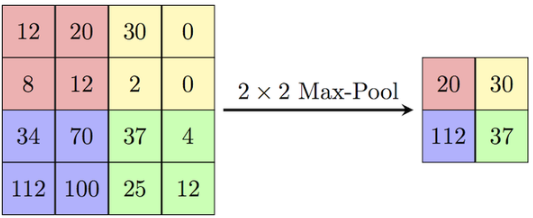

Generando de esta manera una arquitectura general para implementar en la clasificación de imagenes siguiendo la gráfica siguiente

### Arquitectura de un modelo de Clasificación de imagenes

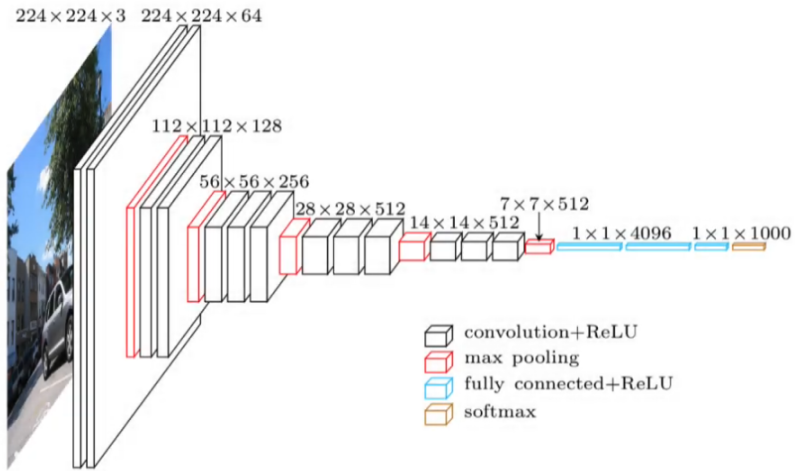

## Código

In [47]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

#Descargar set de datos de MNIST (Numeros escritos a mano, etiquetados)
#datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)

#Obtener en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
#datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data

#Funcion de normalizacion para los datos (Pasar valor de los pixeles de 0-255 a 0-1)
#(Hace que la red aprenda mejor y mas rapido)
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui se pasa de 0-255 a 0-1
  return imagenes, etiquetas

#Normalizar los datos de entrenamiento con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar a cache (usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

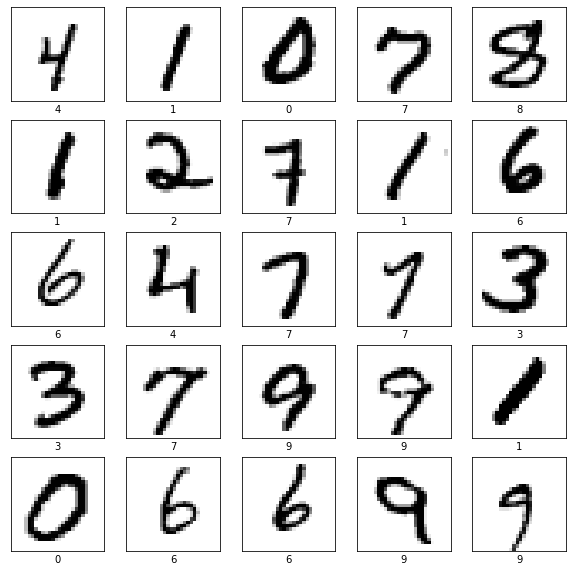

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(clases[etiqueta])

plt.show()  

In [39]:
#Crear el modelo (Ya utiliza capas de convolución y agrupación)
#Cuenta con 1 capa de convolución con 32 núcleos y otra con 64. 2 capas de agrupación.
#Finalmente una capa densa con 100 neuronas
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 es el tamano de la matriz

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 es el tamano de la matriz

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# analizamos la arquitectura del modelo
modelo.summary()


#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [40]:
#Los numeros de datos de entrenamiento y pruebas (60k y 10k)
num_datos_entrenamiento = metadatos.splits["train"].num_examples
num_datos_pruebas = metadatos.splits["test"].num_examples

#Trabajar por lotes
TAMANO_LOTE=32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria
#para que el entrenamiento no se aprenda las cosas en orden
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_datos_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [ ]:
#Realizar el entrenamiento
import math

historial = modelo.fit(
    datos_entrenamiento,
    epochs=60,
    steps_per_epoch=math.ceil(num_datos_entrenamiento/TAMANO_LOTE)
)

### Comprobar el funcionamiento

In [52]:
datos_pruebas


<CacheDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

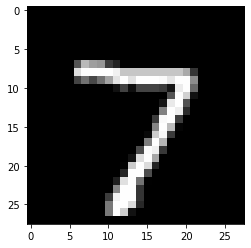

In [55]:


plt.imshow(x_test[0], cmap="gray") # Import the image
plt.show() # Plot the image